In [7]:
!pip install seaborn




In [9]:
plt.style.use('ggplot')


In [10]:
plt.style.use('bmh')


In [11]:
plt.style.use('fivethirtyeight')


In [12]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [15]:
# Install required libraries
!pip install requests pandas matplotlib seaborn

# Imports
import re
import hashlib
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Set matplotlib style
plt.style.use('ggplot')


In [16]:
def validate_password(password):
    """
    Validate password against common PCI DSS and NIST rules.
    Returns a dictionary showing which rules passed or failed.
    """
    rules = {
        "Length >= 12": len(password) >= 12,
        "Contains Uppercase": bool(re.search(r'[A-Z]', password)),
        "Contains Lowercase": bool(re.search(r'[a-z]', password)),
        "Contains Digit": bool(re.search(r'\d', password)),
        "Contains Special Character": bool(re.search(r'[!@#$%^&*(),.?":{}|<>]', password))
    }
    return rules


In [17]:
test_password = "MyS3cure@Pass"
result = validate_password(test_password)
print(f"Validation results for '{test_password}':\n")
for rule, passed in result.items():
    status = "✅ Passed" if passed else "❌ Failed"
    print(f"{status}: {rule}")


Validation results for 'MyS3cure@Pass':

✅ Passed: Length >= 12
✅ Passed: Contains Uppercase
✅ Passed: Contains Lowercase
✅ Passed: Contains Digit
✅ Passed: Contains Special Character


In [18]:
def password_score(password):
    """
    Calculates the password strength score as a percentage
    based on the number of passed validation rules.
    Returns:
        score (float): Percentage from 0 to 100
        rules (dict): Validation results per rule
    """
    rules = validate_password(password)
    passed_rules = sum(rules.values())  # True counts as 1, False as 0
    total_rules = len(rules)
    score = (passed_rules / total_rules) * 100
    return score, rules


In [19]:
test_password = "MyS3cure@Pass"
score, rules = password_score(test_password)

print(f"Password Strength Score: {score:.2f}%")
print("Detailed rule results:")
for rule, passed in rules.items():
    status = "✅ Passed" if passed else "❌ Failed"
    print(f"{status}: {rule}")


Password Strength Score: 100.00%
Detailed rule results:
✅ Passed: Length >= 12
✅ Passed: Contains Uppercase
✅ Passed: Contains Lowercase
✅ Passed: Contains Digit
✅ Passed: Contains Special Character


In [20]:
def check_pwned(password):
    """
    Checks if the given password has been exposed in a data breach using the
    HaveIBeenPwned API with k-anonymity (only first 5 SHA-1 chars sent).

    Returns:
        count (int): Number of times the password has appeared in breaches,
                     0 means not found, -1 means error.
    """
    # Hash the password using SHA-1 and convert to uppercase
    sha1pwd = hashlib.sha1(password.encode()).hexdigest().upper()
    prefix, suffix = sha1pwd[:5], sha1pwd[5:]

    url = f"https://api.pwnedpasswords.com/range/{prefix}"
    response = requests.get(url)

    if response.status_code != 200:
        print("Error: Unable to fetch data from HIBP API")
        return -1

    hashes = (line.split(':') for line in response.text.splitlines())

    for h, count in hashes:
        if h == suffix:
            return int(count)
    return 0


In [21]:
test_password = "MyS3cure@Pass"
breach_count = check_pwned(test_password)

if breach_count > 0:
    print(f"⚠️ Warning: Password found {breach_count} times in breaches!")
elif breach_count == 0:
    print("✅ Good news: Password not found in any known breaches.")
else:
    print("❌ Error occurred during breach check.")


✅ Good news: Password not found in any known breaches.


In [22]:
def compliance_report(password):
    """
    Generates a full password compliance report including:
    - Strength score
    - Rule-by-rule validation
    - Breach check
    """
    # Step 1: Calculate strength and rules
    score, rules = password_score(password)

    # Step 2: Check breaches
    breaches = check_pwned(password)

    # Step 3: Display report
    print("\n🔒 Password Compliance Report")
    print(f"Password: {password}")
    print(f"Strength Score: {score:.2f}%\n")

    print("Rules Compliance:")
    for rule, passed in rules.items():
        status = "✅ Passed" if passed else "❌ Failed"
        print(f"{status}: {rule}")

    # Step 4: Breach status
    if breaches > 0:
        print(f"⚠️ Found in {breaches} breaches!")
    elif breaches == 0:
        print("✅ Not found in known breaches")
    else:
        print("❌ Could not check breaches (API error)")

    # Return values for further visualization
    return score, rules, breaches


In [23]:
test_password = "MyS3cure@Pass"
score, rules, breaches = compliance_report(test_password)



🔒 Password Compliance Report
Password: MyS3cure@Pass
Strength Score: 100.00%

Rules Compliance:
✅ Passed: Length >= 12
✅ Passed: Contains Uppercase
✅ Passed: Contains Lowercase
✅ Passed: Contains Digit
✅ Passed: Contains Special Character
✅ Not found in known breaches


In [24]:
def visualize_rules(password):
    """
    Generates a bar chart visualization of password rule compliance.
    Green = Passed, Red = Failed
    """
    # Generate full report first
    score, rules, breaches = compliance_report(password)

    # Prepare data for visualization
    rule_names = list(rules.keys())
    rule_values = [int(v) for v in rules.values()]  # 1 = passed, 0 = failed
    colors = ['green' if v else 'red' for v in rules.values()]

    # Create bar chart
    plt.figure(figsize=(8,4))
    plt.bar(rule_names, rule_values, color=colors)
    plt.ylim(0,1)
    plt.ylabel("Compliance (1=Pass, 0=Fail)")
    plt.title(f"Password Compliance Rules - Score: {score:.2f}%")

    # Show chart
    plt.show()



🔒 Password Compliance Report
Password: MyS3cure@Pass
Strength Score: 100.00%

Rules Compliance:
✅ Passed: Length >= 12
✅ Passed: Contains Uppercase
✅ Passed: Contains Lowercase
✅ Passed: Contains Digit
✅ Passed: Contains Special Character
✅ Not found in known breaches


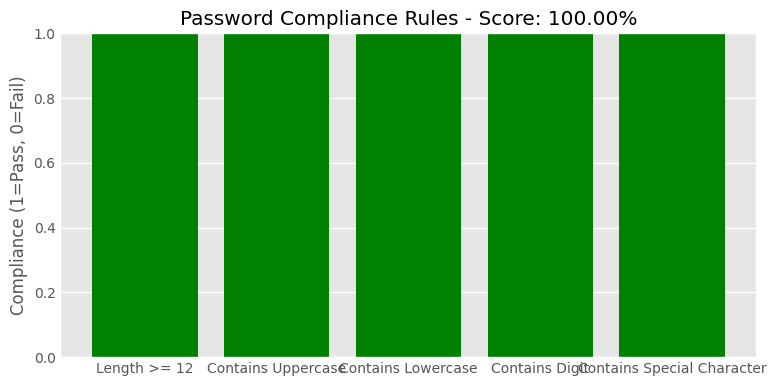

In [25]:
test_password = "MyS3cure@Pass"
visualize_rules(test_password)


In [26]:
# Example list of passwords for batch testing
passwords = ["Password123!", "MyS3cure@Pass", "weakpass", "Admin@2026"]

# Create empty list to store report data
report_data = []

# Loop through each password
for pw in passwords:
    score, rules, breaches = compliance_report(pw)

    # Add data to report
    report_data.append({
        "Password": pw,
        "Strength Score": score,
        "Breaches": breaches,
        **rules
    })

# Convert to DataFrame
df = pd.DataFrame(report_data)

# Show batch report
print("\nBatch Password Compliance Report:\n")
display(df)

# Optional: Export to CSV for professional reporting
df.to_csv("password_compliance_report.csv", index=False)
print("\n✅ Exported report as 'password_compliance_report.csv'")



🔒 Password Compliance Report
Password: Password123!
Strength Score: 100.00%

Rules Compliance:
✅ Passed: Length >= 12
✅ Passed: Contains Uppercase
✅ Passed: Contains Lowercase
✅ Passed: Contains Digit
✅ Passed: Contains Special Character
⚠️ Found in 293751 breaches!

🔒 Password Compliance Report
Password: MyS3cure@Pass
Strength Score: 100.00%

Rules Compliance:
✅ Passed: Length >= 12
✅ Passed: Contains Uppercase
✅ Passed: Contains Lowercase
✅ Passed: Contains Digit
✅ Passed: Contains Special Character
✅ Not found in known breaches

🔒 Password Compliance Report
Password: weakpass
Strength Score: 20.00%

Rules Compliance:
❌ Failed: Length >= 12
❌ Failed: Contains Uppercase
✅ Passed: Contains Lowercase
❌ Failed: Contains Digit
❌ Failed: Contains Special Character
⚠️ Found in 765 breaches!

🔒 Password Compliance Report
Password: Admin@2026
Strength Score: 80.00%

Rules Compliance:
❌ Failed: Length >= 12
✅ Passed: Contains Uppercase
✅ Passed: Contains Lowercase
✅ Passed: Contains Digit
✅ P

,Password,Strength Score,Breaches,Length >= 12,Contains Uppercase,Contains Lowercase,Contains Digit,Contains Special Character
0,Password123!,100.0,293751,True,True,True,True,True
1,MyS3cure@Pass,100.0,0,True,True,True,True,True
2,weakpass,20.0,765,False,False,True,False,False
3,Admin@2026,80.0,1402,False,True,True,True,True



✅ Exported report as 'password_compliance_report.csv'


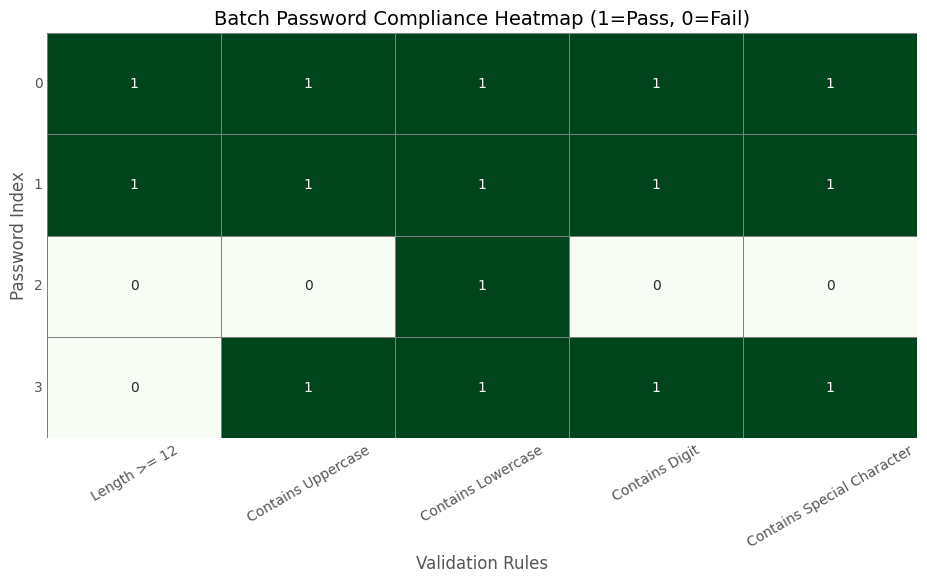

In [28]:
# Import seaborn for heatmap
import seaborn as sns

# Prepare heatmap data: only rules columns (exclude Password, Score, Breaches)
heatmap_data = df.iloc[:, 3:]  # Assuming first 3 columns are Password, Score, Breaches

# Convert True/False to 1/0
heatmap_data_numeric = heatmap_data.astype(int)

# Create heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_data_numeric,
    annot=True,
    cmap="Greens",     # Green = Pass, light/white = Fail
    cbar=False,
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Batch Password Compliance Heatmap (1=Pass, 0=Fail)", fontsize=14)
plt.ylabel("Password Index")
plt.xlabel("Validation Rules")
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.show()
